### **Notebook for recognizing Infilitration, Botnet, DDOS and PORTSCAN Attacks.**

In [47]:

import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline

from sklearn import metrics
from sklearn import tree


# TRAINING-DATASETS FOR TRAINING FOR DIFFERENT ATTACKS
'https://www.unb.ca/cic/datasets' (IDS 2017)

In [48]:
infilitration=pd.read_csv('/content/drive/MyDrive/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv')
botnet=pd.read_csv('/content/drive/MyDrive/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv')
ddos=pd.read_csv('/content/drive/MyDrive/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
portscan=pd.read_csv('/content/drive/MyDrive/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')

FEATURES BEING USED TO PREDICT

In [49]:
infilitration.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [50]:
import numpy as np

infilitration.replace([np.inf, -np.inf], np.nan, inplace=True)
botnet.replace([np.inf, -np.inf], np.nan, inplace=True)
ddos.replace([np.inf, -np.inf], np.nan, inplace=True)
portscan.replace([np.inf, -np.inf], np.nan, inplace=True)





In [51]:
infilitration_X=infilitration.values[:,0:78]
infilitration_Y=infilitration.values[:,78]
botnet_X=botnet.values[:,0:78]
botnet_Y=botnet.values[:,78]
ddos_X=ddos.values[:,0:78]
ddos_Y=ddos.values[:,78]
portscan_X=portscan.values[:,0:78]
portscan_Y=portscan.values[:,78]


In [52]:
infilitration_Y

array(['BENIGN', 'BENIGN', 'BENIGN', ..., 'BENIGN', 'BENIGN', 'BENIGN'],
      dtype=object)

In [53]:
import numpy as np
from sklearn.impute import SimpleImputer
imp_1 = SimpleImputer(missing_values=np.nan, strategy='mean')
infilitration_X=imp_1.fit_transform(infilitration_X)

imp_2 = SimpleImputer(missing_values=np.nan, strategy='mean')
botnet_X=imp_2.fit_transform(botnet_X)

imp_3 = SimpleImputer(missing_values=np.nan, strategy='mean')
ddos_X=imp_3.fit_transform(ddos_X)

imp_4 = SimpleImputer(missing_values=np.nan, strategy='mean')
portscan_X=imp_4.fit_transform(portscan_X)




In [54]:
le_infilitration=LabelEncoder()
le_infilitration.fit(infilitration_Y)
enc_infilitration_Y = le_infilitration.transform(infilitration_Y)

le_botnet=LabelEncoder()
le_botnet.fit(botnet_Y)
enc_botnet_Y = le_botnet.transform(botnet_Y)

le_ddos=LabelEncoder()
le_ddos.fit(ddos_Y)
enc_ddos_Y = le_ddos.transform(ddos_Y)

le_portscan=LabelEncoder()
le_portscan.fit(portscan_Y)
enc_portscan_Y = le_portscan.transform(portscan_Y)

In [55]:
infilitration_X_train, infilitration_X_test, infilitration_Y_train, infilitration_Y_test = train_test_split(infilitration_X, enc_infilitration_Y, test_size=0.2)
botnet_X_train, botnet_X_test, botnet_Y_train, botnet_Y_test = train_test_split(botnet_X, enc_botnet_Y, test_size=0.2)
ddos_X_train, ddos_X_test, ddos_Y_train, ddos_Y_test = train_test_split(ddos_X, enc_ddos_Y, test_size=0.2)
portscan_X_train, portscan_X_test, portscan_Y_train, portscan_Y_test = train_test_split(portscan_X, enc_portscan_Y, test_size=0.2)

In [56]:
infilitration.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,166,1,1,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.000000,12048.192770,166.0000,0.000000e+00,166,166,0,0.0000,0.000,0,0,0,0.0,0.0,0,0,0,0,0,0,32,32,6024.096386,6024.096386,0,0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,1,0.0,0.0,0.0,32,0,0,0,0,0,0,1,0,1,0,290,243,0,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
1,60148,83,1,2,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.000000,36144.578310,41.5000,1.060660e+01,49,34,0,0.0000,0.000,0,0,49,49.0,0.0,49,49,0,0,0,0,32,64,12048.192770,24096.385540,0,0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,2,0.0,0.0,0.0,32,0,0,0,0,0,0,1,0,2,0,243,290,0,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
2,123,99947,1,1,48,48,48,48,48.0,0.0,48,48,48.0,0.0,960.509070,20.010606,99947.0000,0.000000e+00,99947,99947,0,0.0000,0.000,0,0,0,0.0,0.0,0,0,0,0,0,0,40,40,10.005303,10.005303,48,48,48.0,0.0,0.0,0,0,0,0,0,0,0,0,1,72.0,48.0,48.0,40,0,0,0,0,0,0,1,48,1,48,-1,-1,0,40,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
3,123,37017,1,1,48,48,48,48,48.0,0.0,48,48,48.0,0.0,2593.403031,54.029230,37017.0000,0.000000e+00,37017,37017,0,0.0000,0.000,0,0,0,0.0,0.0,0,0,0,0,0,0,32,32,27.014615,27.014615,48,48,48.0,0.0,0.0,0,0,0,0,0,0,0,0,1,72.0,48.0,48.0,32,0,0,0,0,0,0,1,48,1,48,-1,-1,0,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
4,0,111161336,147,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.000000,1.322402,761379.0137,2.539814e+06,13600000,0,111000000,761379.0137,2539814.273,13600000,0,0,0.0,0.0,0,0,0,0,0,0,0,0,1.322402,0.000000,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,147,0,0,0,-1,-1,0,0,1753752.625,2123197.578,4822992,95,9463032.7,2657727.996,13600000,5700287,BENIGN


# RANDOM FOREST FOR EACH

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [58]:
rf_classifier_infilitration=RandomForestClassifier(max_depth=2, random_state=0)
rf_classifier_botnet=RandomForestClassifier(max_depth=2, random_state=0)
rf_classifier_ddos=RandomForestClassifier(max_depth=2, random_state=0)
rf_classifier_portscan=RandomForestClassifier(max_depth=2, random_state=0)


In [59]:
rf_classifier_infilitration.fit(infilitration_X_train, infilitration_Y_train)
rf_classifier_botnet.fit(botnet_X_train, botnet_Y_train)
rf_classifier_ddos.fit(ddos_X_train, ddos_Y_train)
rf_classifier_portscan.fit(portscan_X_train, portscan_Y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [60]:
prediction_infilitration = rf_classifier_infilitration.predict(infilitration_X_test)
prediction_botnet = rf_classifier_botnet.predict(botnet_X_test)
prediction_ddos = rf_classifier_ddos.predict(ddos_X_test)
prediction_portscan = rf_classifier_portscan.predict(portscan_X_test)

### Displaying the performance by Random Forest on each of the Attack Types

In [61]:
i = 0
rf_correct_predictions_infilitration = 0
rf_incorrect_predictions_infilitration = 0
rf_true_positive_infilitration = 0
rf_true_negative_infilitration = 0
rf_false_positive_infilitration = 0
rf_false_negative_infilitration = 0
for item in prediction_infilitration:
    if((item == 1) and (infilitration_Y_test[i] == 1)):
        rf_correct_predictions_infilitration += 1
        rf_true_positive_infilitration += 1
    elif((item == 0) and (infilitration_Y_test[i] == 0)):
        rf_correct_predictions_infilitration += 1
        rf_true_negative_infilitration += 1
    elif((item == 0) and (infilitration_Y_test[i] == 1)):
        rf_incorrect_predictions_infilitration += 1
        rf_false_negative_infilitration += 1
    elif((item == 1) and (infilitration_Y_test[i] == 0)):
        rf_incorrect_predictions_infilitration += 1
        rf_false_positive_infilitration += 1
        
    i += 1


In [62]:
print("\n\nRandom Forest for Infilitration Dataset")
print("Total entries: %d" % (i))
print("Total correct predictions: %d" % (rf_correct_predictions_infilitration))
print("Total incorrect predictions: %d" % (rf_incorrect_predictions_infilitration))
print("-------------- Breakdown ---------------")
print("True positives: %d" % (rf_true_positive_infilitration))
print("True negatives: %d" % (rf_true_negative_infilitration))
print("False positives: %d" % (rf_false_positive_infilitration))
print("False negatives: %d" % (rf_false_negative_infilitration))



Random Forest for Infilitration Dataset
Total entries: 57721
Total correct predictions: 57714
Total incorrect predictions: 7
-------------- Breakdown ---------------
True positives: 2
True negatives: 57712
False positives: 0
False negatives: 7


In [63]:
i = 0
rf_correct_predictions_botnet= 0
rf_incorrect_predictions_botnet = 0
rf_true_positive_botnet = 0
rf_true_negative_botnet = 0
rf_false_positive_botnet = 0
rf_false_negative_botnet = 0
for item in prediction_botnet:
    if((item == 1) and (botnet_Y_test[i] == 1)):
        rf_correct_predictions_botnet += 1
        rf_true_positive_botnet += 1
    elif((item == 0) and (botnet_Y_test[i] == 0)):
        rf_correct_predictions_botnet += 1
        rf_true_negative_botnet += 1
    elif((item == 0) and (botnet_Y_test[i] == 1)):
        rf_incorrect_predictions_botnet += 1
        rf_false_negative_botnet += 1
    elif((item == 1) and (botnet_Y_test[i] == 0)):
        rf_incorrect_predictions_botnet += 1
        rf_false_positive_botnet += 1
        
    i += 1


In [64]:
print("\n\nRandom Forest for Botnet Dataset")
print("Total entries: %d" % (i))
print("Total correct predictions: %d" % (rf_correct_predictions_botnet))
print("Total incorrect predictions: %d" % (rf_incorrect_predictions_botnet))
print("-------------- Breakdown ---------------")
print("True positives: %d" % (rf_true_positive_botnet))
print("True negatives: %d" % (rf_true_negative_botnet))
print("False positives: %d" % (rf_false_positive_botnet))
print("False negatives: %d" % (rf_false_negative_botnet))



Random Forest for Botnet Dataset
Total entries: 38207
Total correct predictions: 37833
Total incorrect predictions: 374
-------------- Breakdown ---------------
True positives: 0
True negatives: 37833
False positives: 0
False negatives: 374


In [65]:
i = 0
rf_correct_predictions_ddos = 0
rf_incorrect_predictions_ddos = 0
rf_true_positive_ddos = 0
rf_true_negative_ddos = 0
rf_false_positive_ddos = 0
rf_false_negative_ddos = 0
for item in prediction_ddos:
    if((item == 1) and (ddos_Y_test[i] == 1)):
        rf_correct_predictions_ddos += 1
        rf_true_positive_ddos += 1
    elif((item == 0) and (ddos_Y_test[i] == 0)):
        rf_correct_predictions_ddos += 1
        rf_true_negative_ddos += 1
    elif((item == 0) and (ddos_Y_test[i] == 1)):
        rf_incorrect_predictions_ddos += 1
        rf_false_negative_ddos += 1
    elif((item == 1) and (ddos_Y_test[i] == 0)):
        rf_incorrect_predictions_ddos += 1
        rf_false_positive_ddos += 1
        
    i += 1


In [66]:
print("\n\nRandom Forest for DDOS Dataset")
print("Total entries: %d" % (i))
print("Total correct predictions: %d" % (rf_correct_predictions_ddos))
print("Total incorrect predictions: %d" % (rf_incorrect_predictions_ddos))
print("-------------- Breakdown ---------------")
print("True positives: %d" % (rf_true_positive_ddos))
print("True negatives: %d" % (rf_true_negative_ddos))
print("False positives: %d" % (rf_false_positive_ddos))
print("False negatives: %d" % (rf_false_negative_ddos))



Random Forest for DDOS Dataset
Total entries: 45149
Total correct predictions: 44649
Total incorrect predictions: 500
-------------- Breakdown ---------------
True positives: 25538
True negatives: 19111
False positives: 463
False negatives: 37


In [67]:
i = 0
rf_correct_predictions_portscan = 0
rf_incorrect_predictions_portscan = 0
rf_true_positive_portscan = 0
rf_true_negative_portscan = 0
rf_false_positive_portscan = 0
rf_false_negative_portscan = 0
for item in prediction_portscan:
    if((item == 1) and (portscan_Y_test[i] == 1)):
        rf_correct_predictions_portscan += 1
        rf_true_positive_portscan += 1
    elif((item == 0) and (portscan_Y_test[i] == 0)):
        rf_correct_predictions_portscan += 1
        rf_true_negative_portscan += 1
    elif((item == 0) and (portscan_Y_test[i] == 1)):
        rf_incorrect_predictions_portscan += 1
        rf_false_negative_portscan += 1
    elif((item == 1) and (portscan_Y_test[i] == 0)):
        rf_incorrect_predictions_portscan += 1
        rf_false_positive_portscan += 1
        
    i += 1


In [68]:
print("\n\nRandom Forest for Portscan Dataset")
print("Total entries: %d" % (i))
print("Total correct predictions: %d" % (rf_incorrect_predictions_portscan))
print("Total incorrect predictions: %d" % (rf_incorrect_predictions_portscan))
print("-------------- Breakdown ---------------")
print("True positives: %d" % (rf_true_positive_portscan))
print("True negatives: %d" % (rf_true_negative_portscan))
print("False positives: %d" % (rf_false_positive_portscan))
print("False negatives: %d" % (rf_false_negative_portscan))



Random Forest for Portscan Dataset
Total entries: 57294
Total correct predictions: 427
Total incorrect predictions: 427
-------------- Breakdown ---------------
True positives: 31571
True negatives: 25296
False positives: 174
False negatives: 253


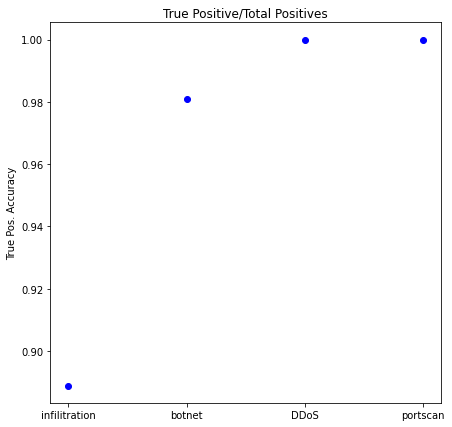

In [69]:
import matplotlib.pyplot as plt
acc_infilitration=true_positive_infilitration/(true_positive_infilitration+false_negative_infilitration)
acc_botnet=true_positive_botnet/(true_positive_botnet+false_negative_botnet)
acc_ddos=true_positive_ddos/(true_positive_ddos+false_negative_ddos)
acc_portscan=true_positive_portscan/(true_positive_portscan+false_negative_portscan)

plt.figure(figsize=(7,7))
plt.plot(['infilitration','botnet','DDoS','portscan'],[acc_infilitration,acc_botnet,acc_ddos,acc_portscan],'bo',)
plt.ylabel('True Pos. Accuracy')
plt.title('True Positive/Total Positives')
plt.savefig('acc_fig_2.png')

# DESICION TREES IMPLEMENTATION

In [70]:
tree_classifier_infilitration=tree.DecisionTreeClassifier()
tree_classifier_infilitration.fit(infilitration_X_train, infilitration_Y_train)
predictions_DT_infilitration = tree_classifier_infilitration.predict(infilitration_X_test)

tree_classifier_botnet=tree.DecisionTreeClassifier()
tree_classifier_botnet.fit(botnet_X_train, botnet_Y_train)
predictions_DT_botnet = tree_classifier_botnet.predict(botnet_X_test)

tree_classifier_ddos=tree.DecisionTreeClassifier()
tree_classifier_ddos.fit(ddos_X_train, ddos_Y_train)
predictions_DT_ddos = tree_classifier_ddos.predict(ddos_X_test)

tree_classifier_portscan=tree.DecisionTreeClassifier()
tree_classifier_portscan.fit(portscan_X_train, portscan_Y_train)
predictions_DT_portscan = tree_classifier_portscan.predict(portscan_X_test)


### DECISION TREE PERFORMANCE

In [71]:
i = 0
correct_predictions_infilitration= 0
incorrect_predictions_infilitration = 0
true_positive_infilitration = 0
true_negative_infilitration = 0
false_positive_infilitration = 0
false_negative_infilitration = 0
for item in predictions_DT_infilitration:
    if((item == 1) and (infilitration_Y_test[i] == 1)):
        correct_predictions_infilitration += 1
        true_positive_infilitration += 1
    elif((item == 0) and (infilitration_Y_test[i] == 0)):
        correct_predictions_infilitration += 1
        true_negative_infilitration += 1
    elif((item == 0) and (infilitration_Y_test[i] == 1)):
        incorrect_predictions_infilitration += 1
        false_negative_infilitration += 1
    elif((item == 1) and (infilitration_Y_test[i] == 0)):
        incorrect_predictions_infilitration += 1
        false_positive_infilitration += 1
        
    i += 1

In [72]:
print("\n\nDecision Tree for infilitration")

print("Total correct predictions: %d" % (correct_predictions_infilitration))
print("Total incorrect predictions: %d" % (incorrect_predictions_infilitration))
print("-------------- Breakdown ---------------")
print("True positives: %d" % (true_positive_infilitration))
print("True negatives: %d" % (true_negative_infilitration))
print("False positives: %d" % (false_positive_infilitration))
print("False negatives: %d" % (false_negative_infilitration))



Decision Tree for infilitration
Total correct predictions: 57714
Total incorrect predictions: 7
-------------- Breakdown ---------------
True positives: 6
True negatives: 57708
False positives: 4
False negatives: 3


In [73]:
i = 0
correct_predictions_botnet = 0
incorrect_predictions_botnet = 0
true_positive_botnet = 0
true_negative_botnet = 0
false_positive_botnet = 0
false_negative_botnet = 0
for item in predictions_DT_botnet:
    if((item == 1) and (botnet_Y_test[i] == 1)):
        correct_predictions_botnet += 1
        true_positive_botnet += 1
    elif((item == 0) and (botnet_Y_test[i] == 0)):
        correct_predictions_botnet += 1
        true_negative_botnet += 1
    elif((item == 0) and (botnet_Y_test[i] == 1)):
        incorrect_predictions_botnet += 1
        false_negative_botnet += 1
    elif((item == 1) and (botnet_Y_test[i] == 0)):
        incorrect_predictions_botnet += 1
        false_positive_botnet += 1
        
    i += 1

In [74]:
print("\n\nDecision Tree for botnet")

print("Total correct predictions: %d" % (correct_predictions_botnet))
print("Total incorrect predictions: %d" % (incorrect_predictions_botnet))
print("-------------- Breakdown ---------------")
print("True positives: %d" % (true_positive_botnet))
print("True negatives: %d" % (true_negative_botnet))
print("False positives: %d" % (false_positive_botnet))
print("False negatives: %d" % (false_negative_botnet))



Decision Tree for botnet
Total correct predictions: 38193
Total incorrect predictions: 14
-------------- Breakdown ---------------
True positives: 367
True negatives: 37826
False positives: 7
False negatives: 7


In [75]:
i = 0
correct_predictions_ddos = 0
incorrect_predictions_ddos = 0
true_positive_ddos = 0
true_negative_ddos = 0
false_positive_ddos = 0
false_negative_ddos = 0
for item in predictions_DT_ddos:
    if((item == 1) and (ddos_Y_test[i] == 1)):
        correct_predictions_ddos += 1
        true_positive_ddos += 1
    elif((item == 0) and (ddos_Y_test[i] == 0)):
        correct_predictions_ddos += 1
        true_negative_ddos += 1
    elif((item == 0) and (ddos_Y_test[i] == 1)):
        incorrect_predictions_ddos += 1
        false_negative_ddos += 1
    elif((item == 1) and (ddos_Y_test[i] == 0)):
        incorrect_predictions_ddos += 1
        false_positive_ddos += 1
        
    i += 1

In [76]:
print("\n\nDecision Tree for ddos")

print("Total correct predictions: %d" % (correct_predictions_ddos))
print("Total incorrect predictions: %d" % (incorrect_predictions_ddos))
print("-------------- Breakdown ---------------")
print("True positives: %d" % (true_positive_ddos))
print("True negatives: %d" % (true_negative_ddos))
print("False positives: %d" % (false_positive_ddos))
print("False negatives: %d" % (false_negative_ddos))



Decision Tree for ddos
Total correct predictions: 45143
Total incorrect predictions: 6
-------------- Breakdown ---------------
True positives: 25573
True negatives: 19570
False positives: 4
False negatives: 2


In [77]:
i = 0
correct_predictions_portscan = 0
incorrect_predictions_portscan = 0
true_positive_portscan = 0
true_negative_portscan = 0
false_positive_portscan = 0
false_negative_portscan= 0
for item in predictions_DT_portscan:
    if((item == 1) and (portscan_Y_test[i] == 1)):
        correct_predictions_portscan += 1
        true_positive_portscan += 1
    elif((item == 0) and (portscan_Y_test[i] == 0)):
        correct_predictions_portscan += 1
        true_negative_portscan += 1
    elif((item == 0) and (portscan_Y_test[i] == 1)):
        incorrect_predictions_portscan += 1
        false_negative_portscan += 1
    elif((item == 1) and (portscan_Y_test[i] == 0)):
        incorrect_predictions_portscan += 1
        false_positive_portscan += 1
        
    i += 1

In [78]:
print("\n\nDecision Tree for portscan")

print("Total correct predictions: %d" % (correct_predictions_portscan))
print("Total incorrect predictions: %d" % (incorrect_predictions_portscan))
print("-------------- Breakdown ---------------")
print("True positives: %d" % (true_positive_portscan))
print("True negatives: %d" % (true_negative_portscan))
print("False positives: %d" % (false_positive_portscan))
print("False negatives: %d" % (false_negative_portscan))



Decision Tree for portscan
Total correct predictions: 57287
Total incorrect predictions: 7
-------------- Breakdown ---------------
True positives: 31819
True negatives: 25468
False positives: 2
False negatives: 5


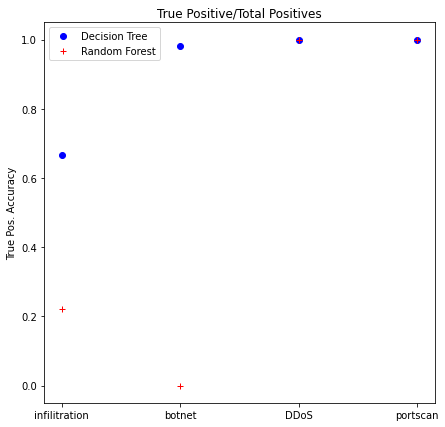

In [88]:
import matplotlib.pyplot as plt
acc_infilitration=true_positive_infilitration/(true_positive_infilitration+false_negative_infilitration)
acc_botnet=true_positive_botnet/(true_positive_botnet+false_negative_botnet)
acc_ddos=true_positive_ddos/(true_positive_ddos+false_negative_ddos)
acc_portscan=true_positive_portscan/(true_positive_portscan+false_negative_portscan)

rf_acc_infilitration=rf_true_positive_infilitration/(rf_true_positive_infilitration+rf_false_negative_infilitration)
rf_acc_botnet=rf_true_positive_botnet/(rf_true_positive_botnet+rf_false_negative_botnet)
rf_acc_ddos=rf_true_positive_ddos/(rf_true_positive_ddos+rf_false_negative_ddos)
rf_acc_portscan=rf_true_positive_portscan/(rf_true_positive_portscan+rf_false_negative_portscan)

plt.figure(figsize=(7,7))
plt.plot(['infilitration','botnet','DDoS','portscan'],[acc_infilitration,acc_botnet,acc_ddos,acc_portscan],'bo',)
plt.plot(['infilitration','botnet','DDoS','portscan'],[rf_acc_infilitration,rf_acc_botnet,rf_acc_ddos,acc_portscan],'r+',)
plt.ylabel('True Pos. Accuracy')
plt.legend(['Decision Tree','Random Forest'])
plt.title('True Positive/Total Positives')
plt.savefig('acc_fig_2.png')

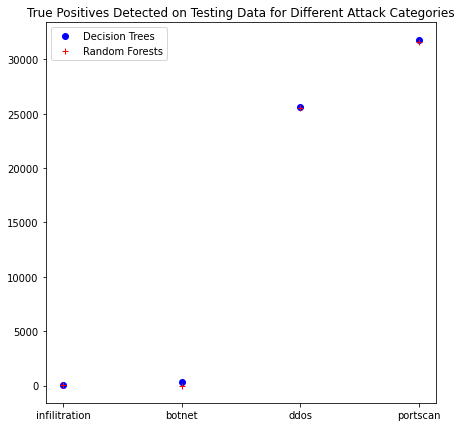

In [91]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
plt.plot(['infilitration','botnet','ddos','portscan'],[true_positive_infilitration,true_positive_botnet,true_positive_ddos,true_positive_portscan],'bo')
plt.plot(['infilitration','botnet','ddos','portscan'],[rf_true_positive_infilitration,rf_true_positive_botnet,rf_true_positive_ddos,rf_true_positive_portscan],'r+')
plt.legend(['Decision Trees','Random Forests'])
plt.title('True Positives Detected on Testing Data for Different Attack Categories')
plt.savefig('performance1.png')


### USE YOUR OWN DATA HERE

In [80]:
##  Use these to test a connection...reshape ur data using reshape(-1,1) and pass it throught any of the below functions.
# If it shows a value near one it may be an attacker!!



# tree_classifier_infilitration.predict(data)

# tree_classifier_botnet.predict(data)

# tree_classifier_ddos.predict(data)

# tree_classifier_portscan.predict(data)


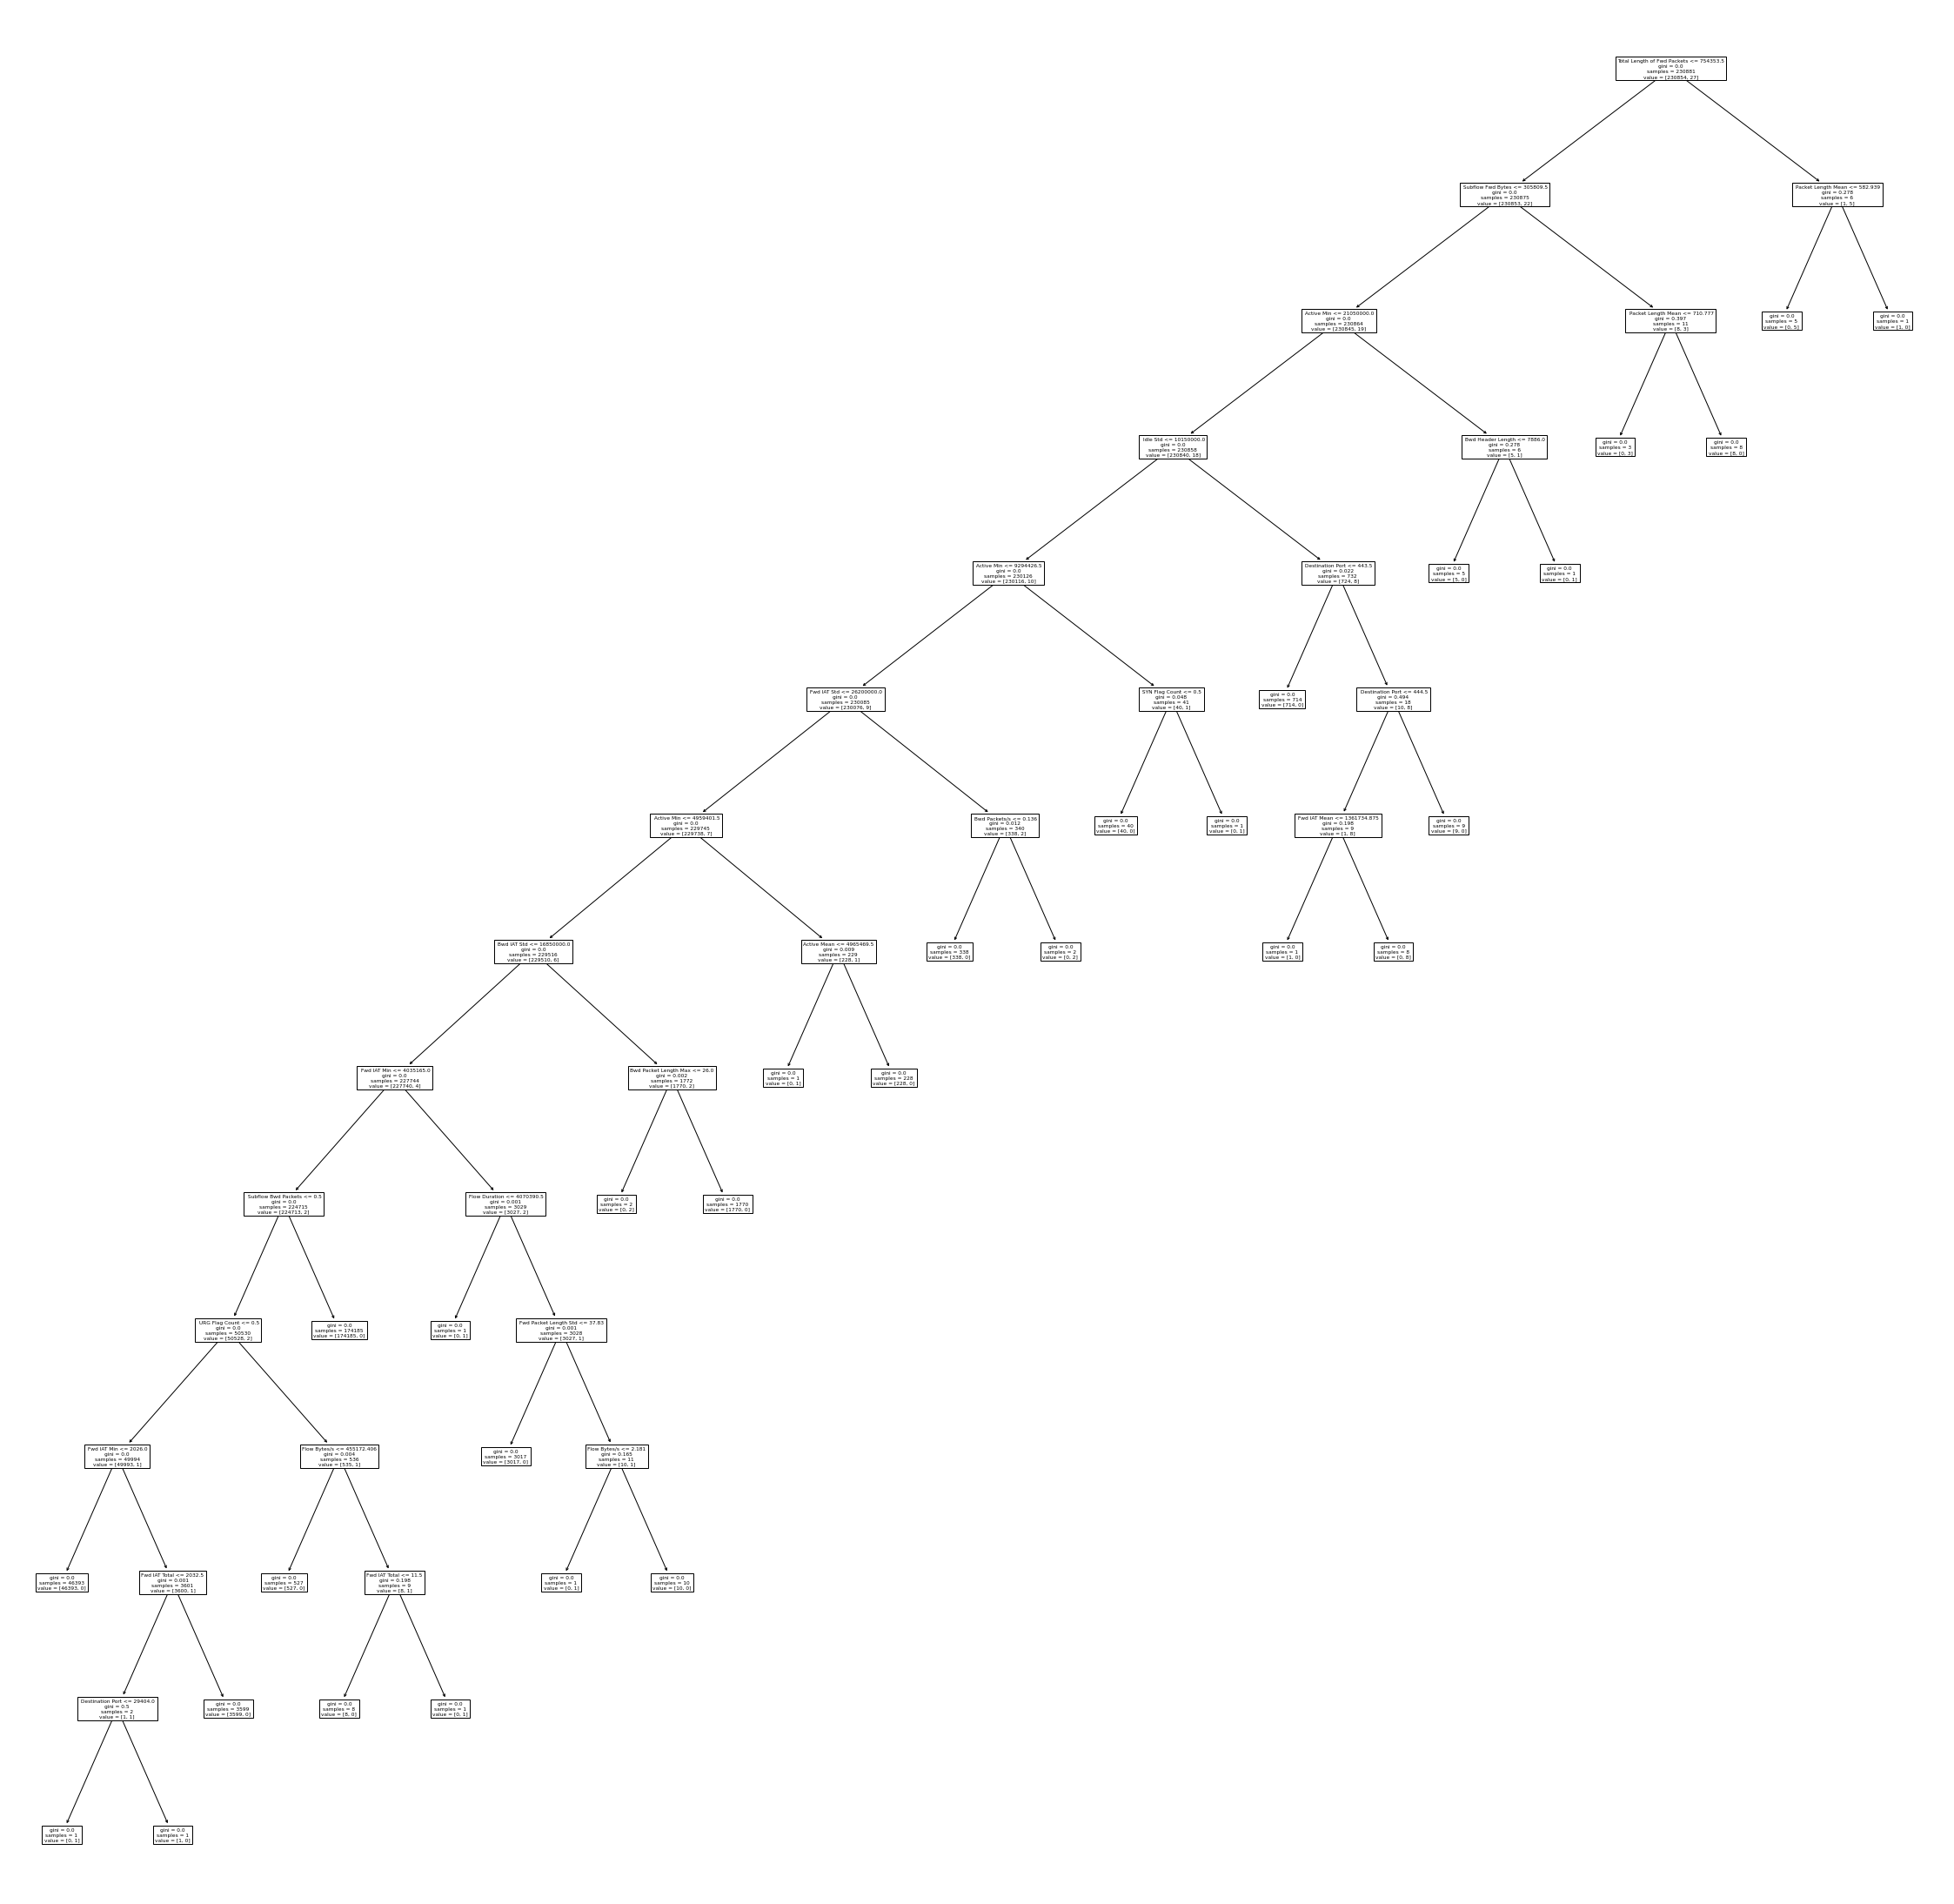

In [81]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))
tree.plot_tree(tree_classifier_infilitration,feature_names=infilitration.columns[:-1],)
plt.savefig('infilitration_tree.png')

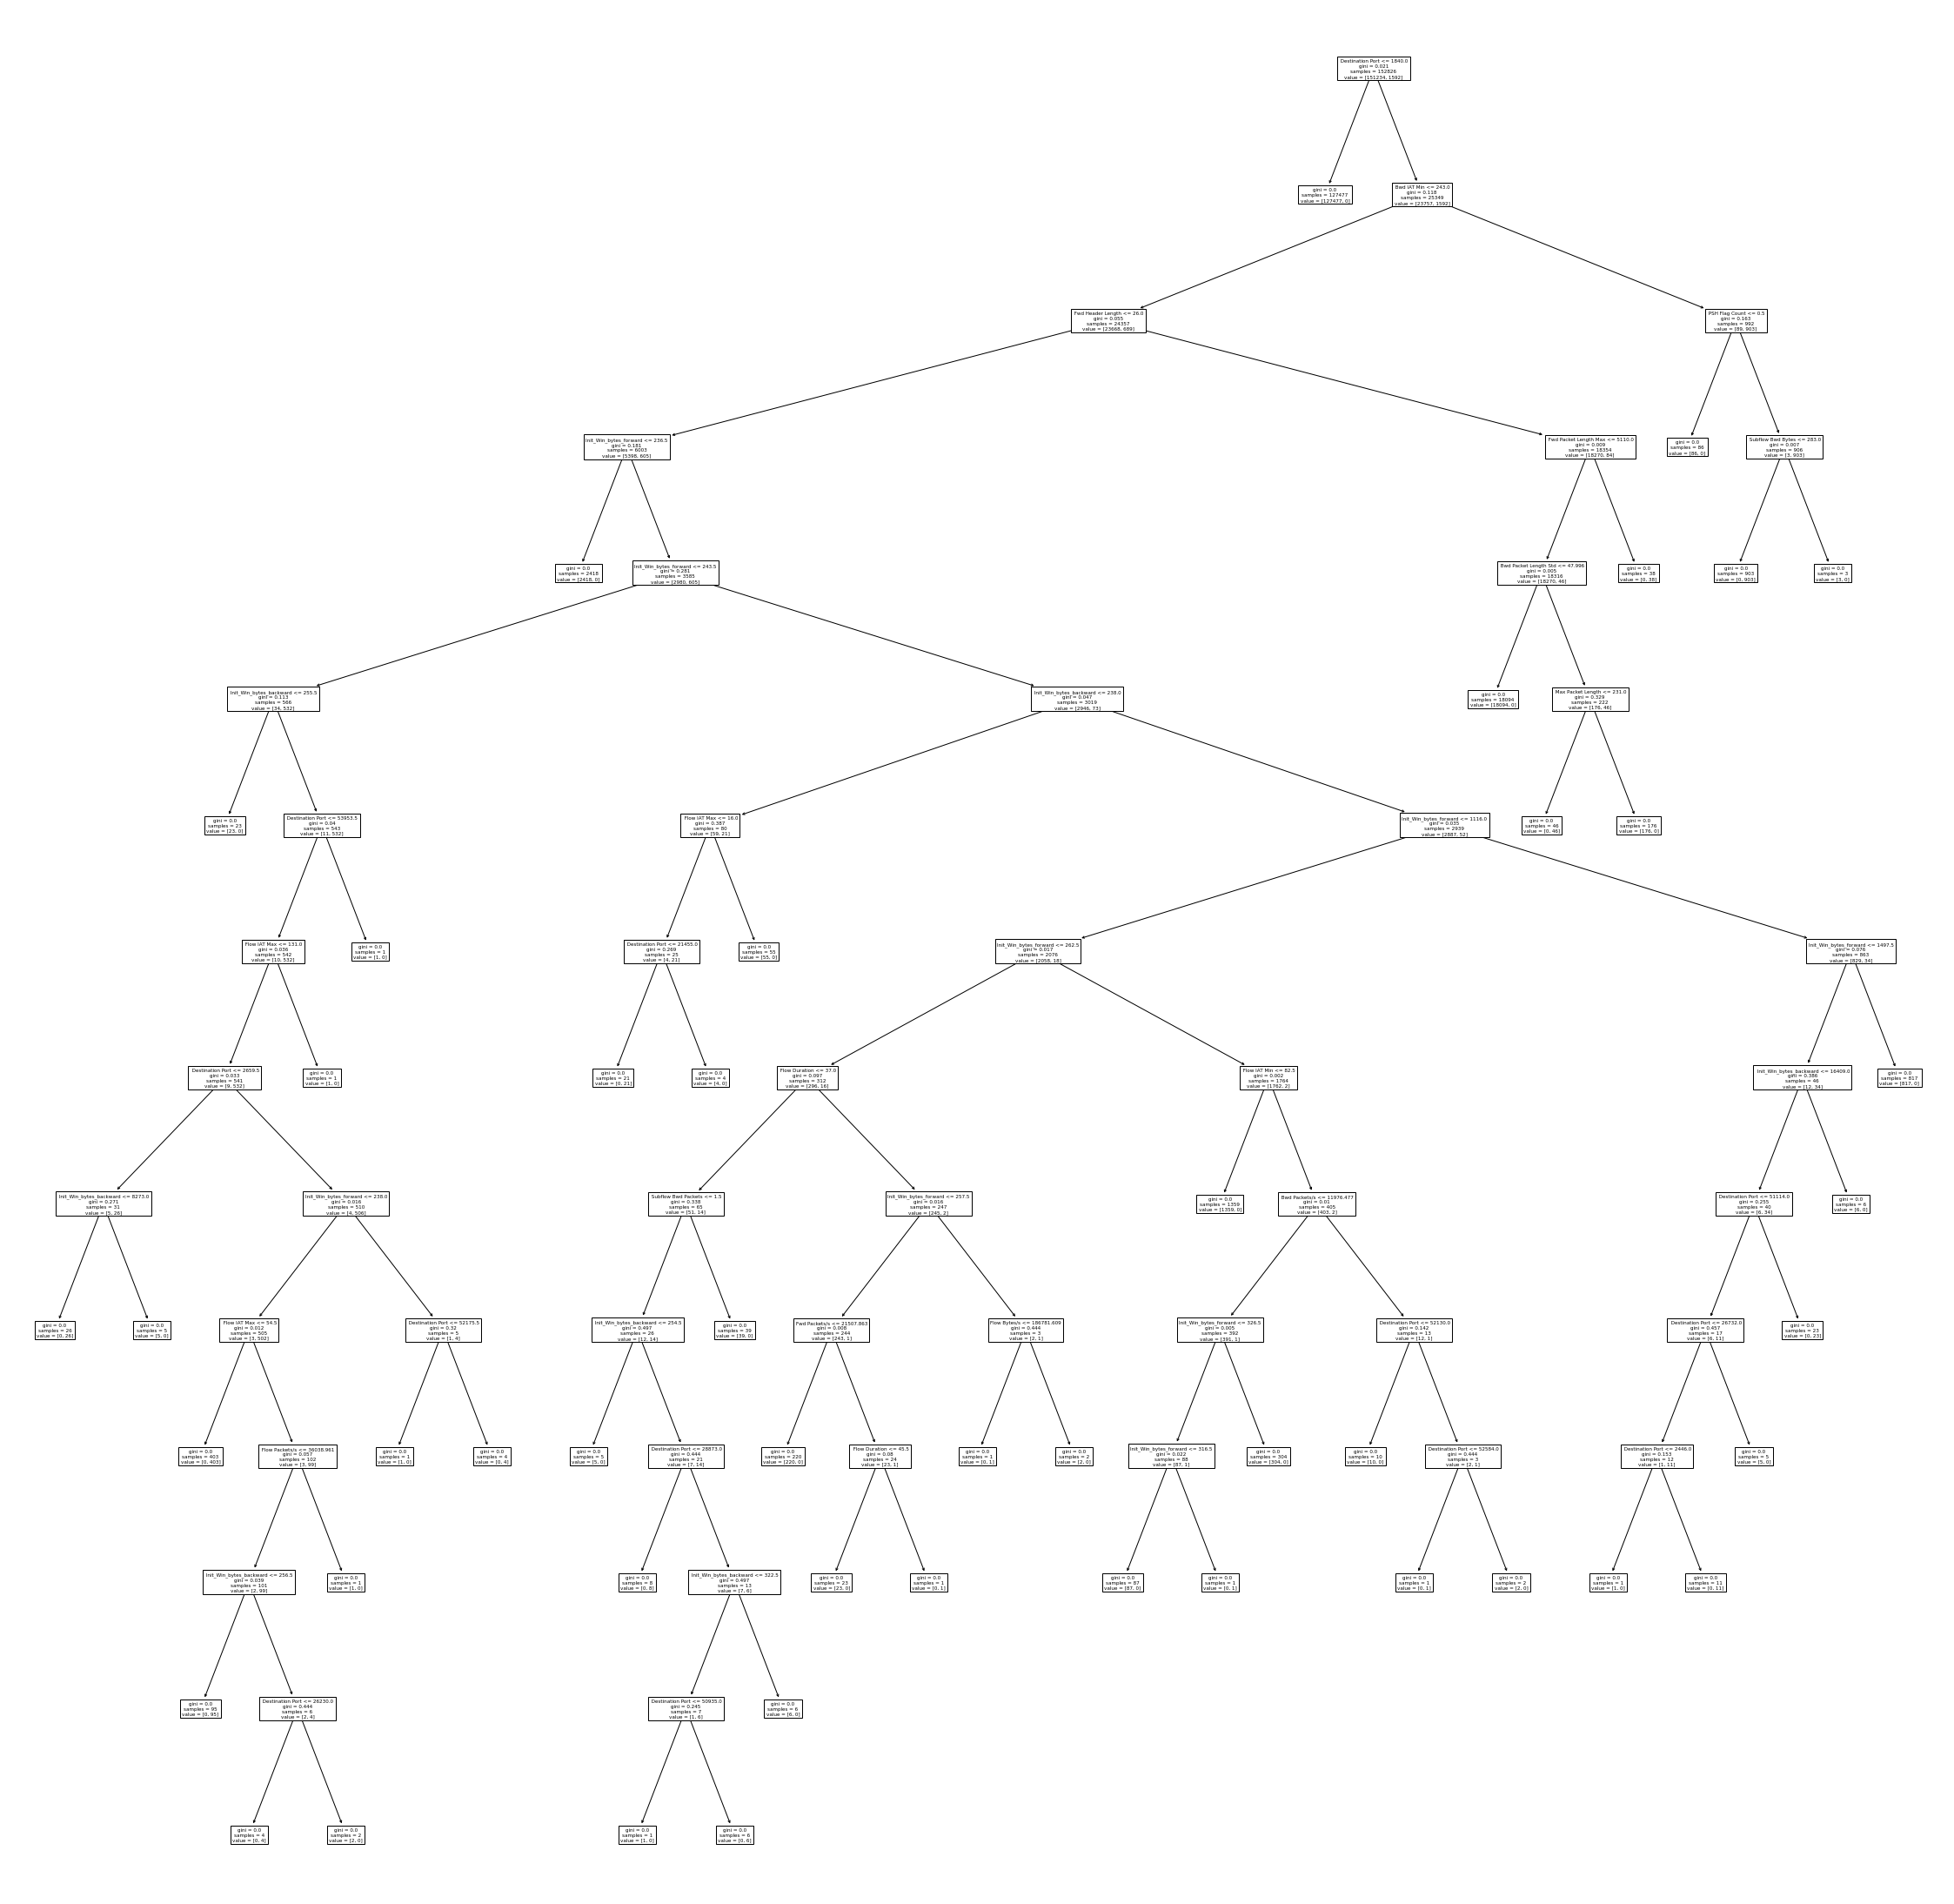

In [82]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))
tree.plot_tree(tree_classifier_botnet,feature_names=botnet.columns[:-1],)
plt.savefig('botnet_tree.png')

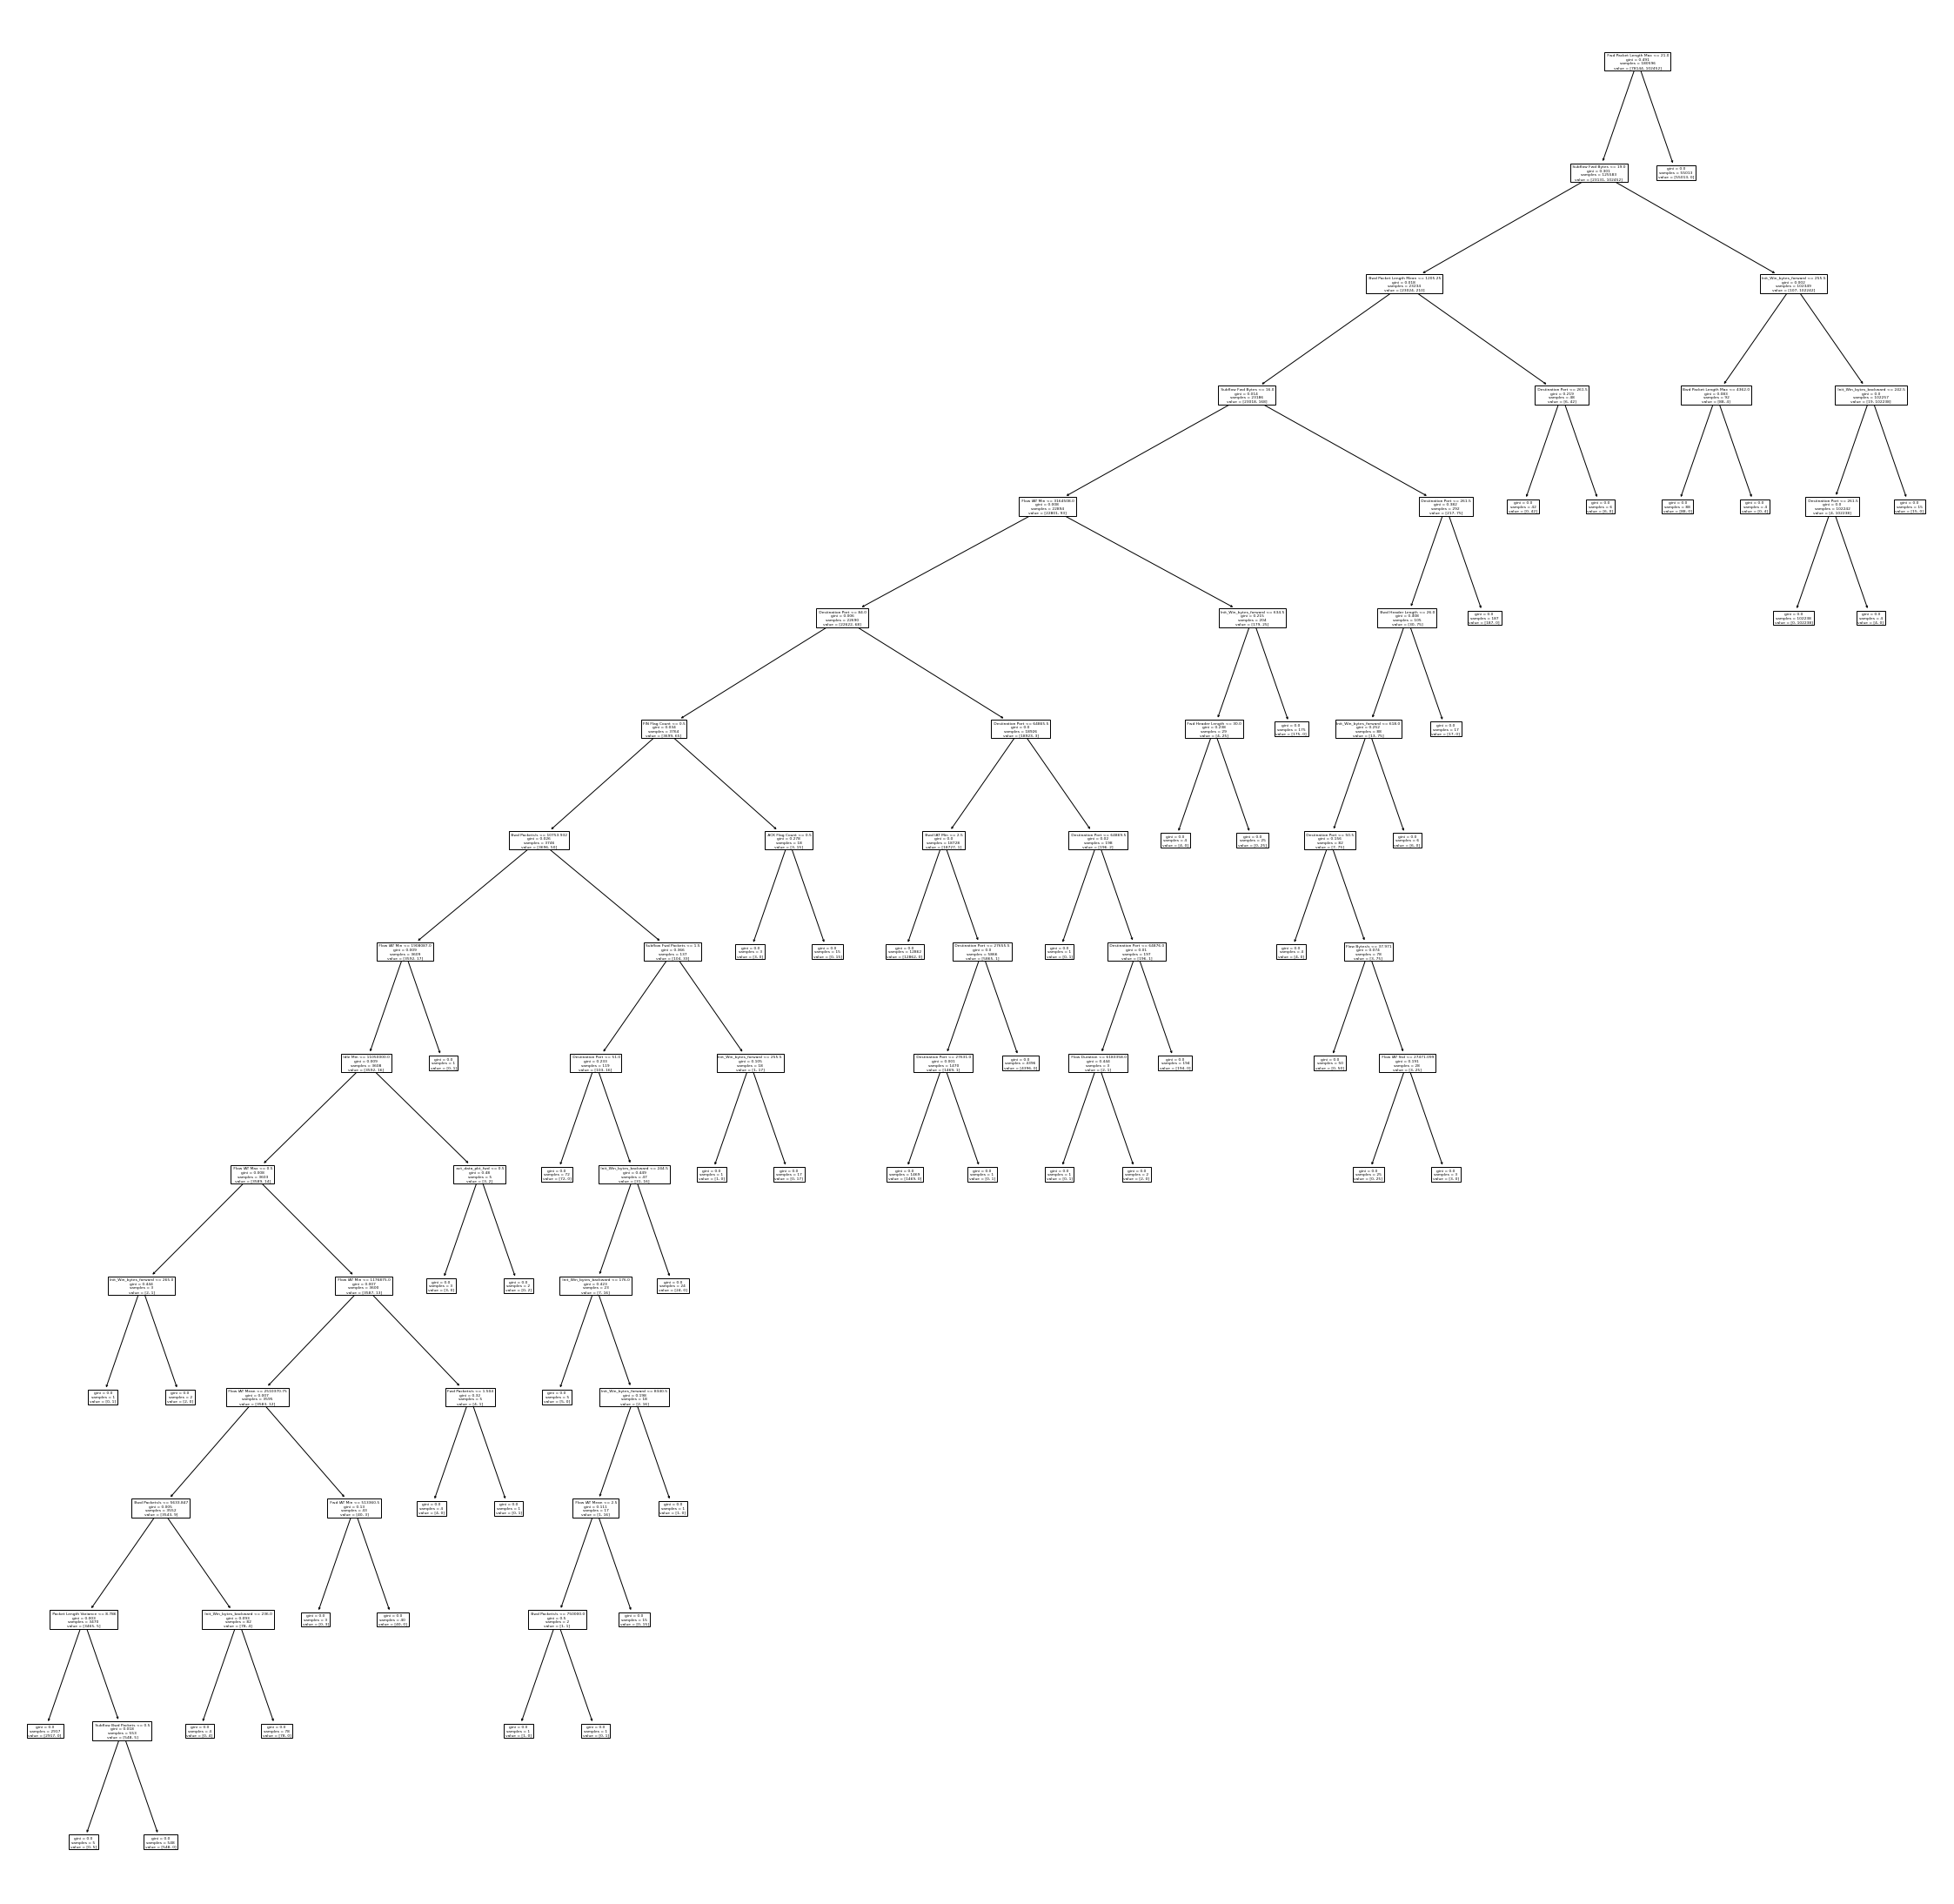

In [83]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))
tree.plot_tree(tree_classifier_ddos,feature_names=ddos.columns[:-1],)
plt.savefig('ddos_tree.png')

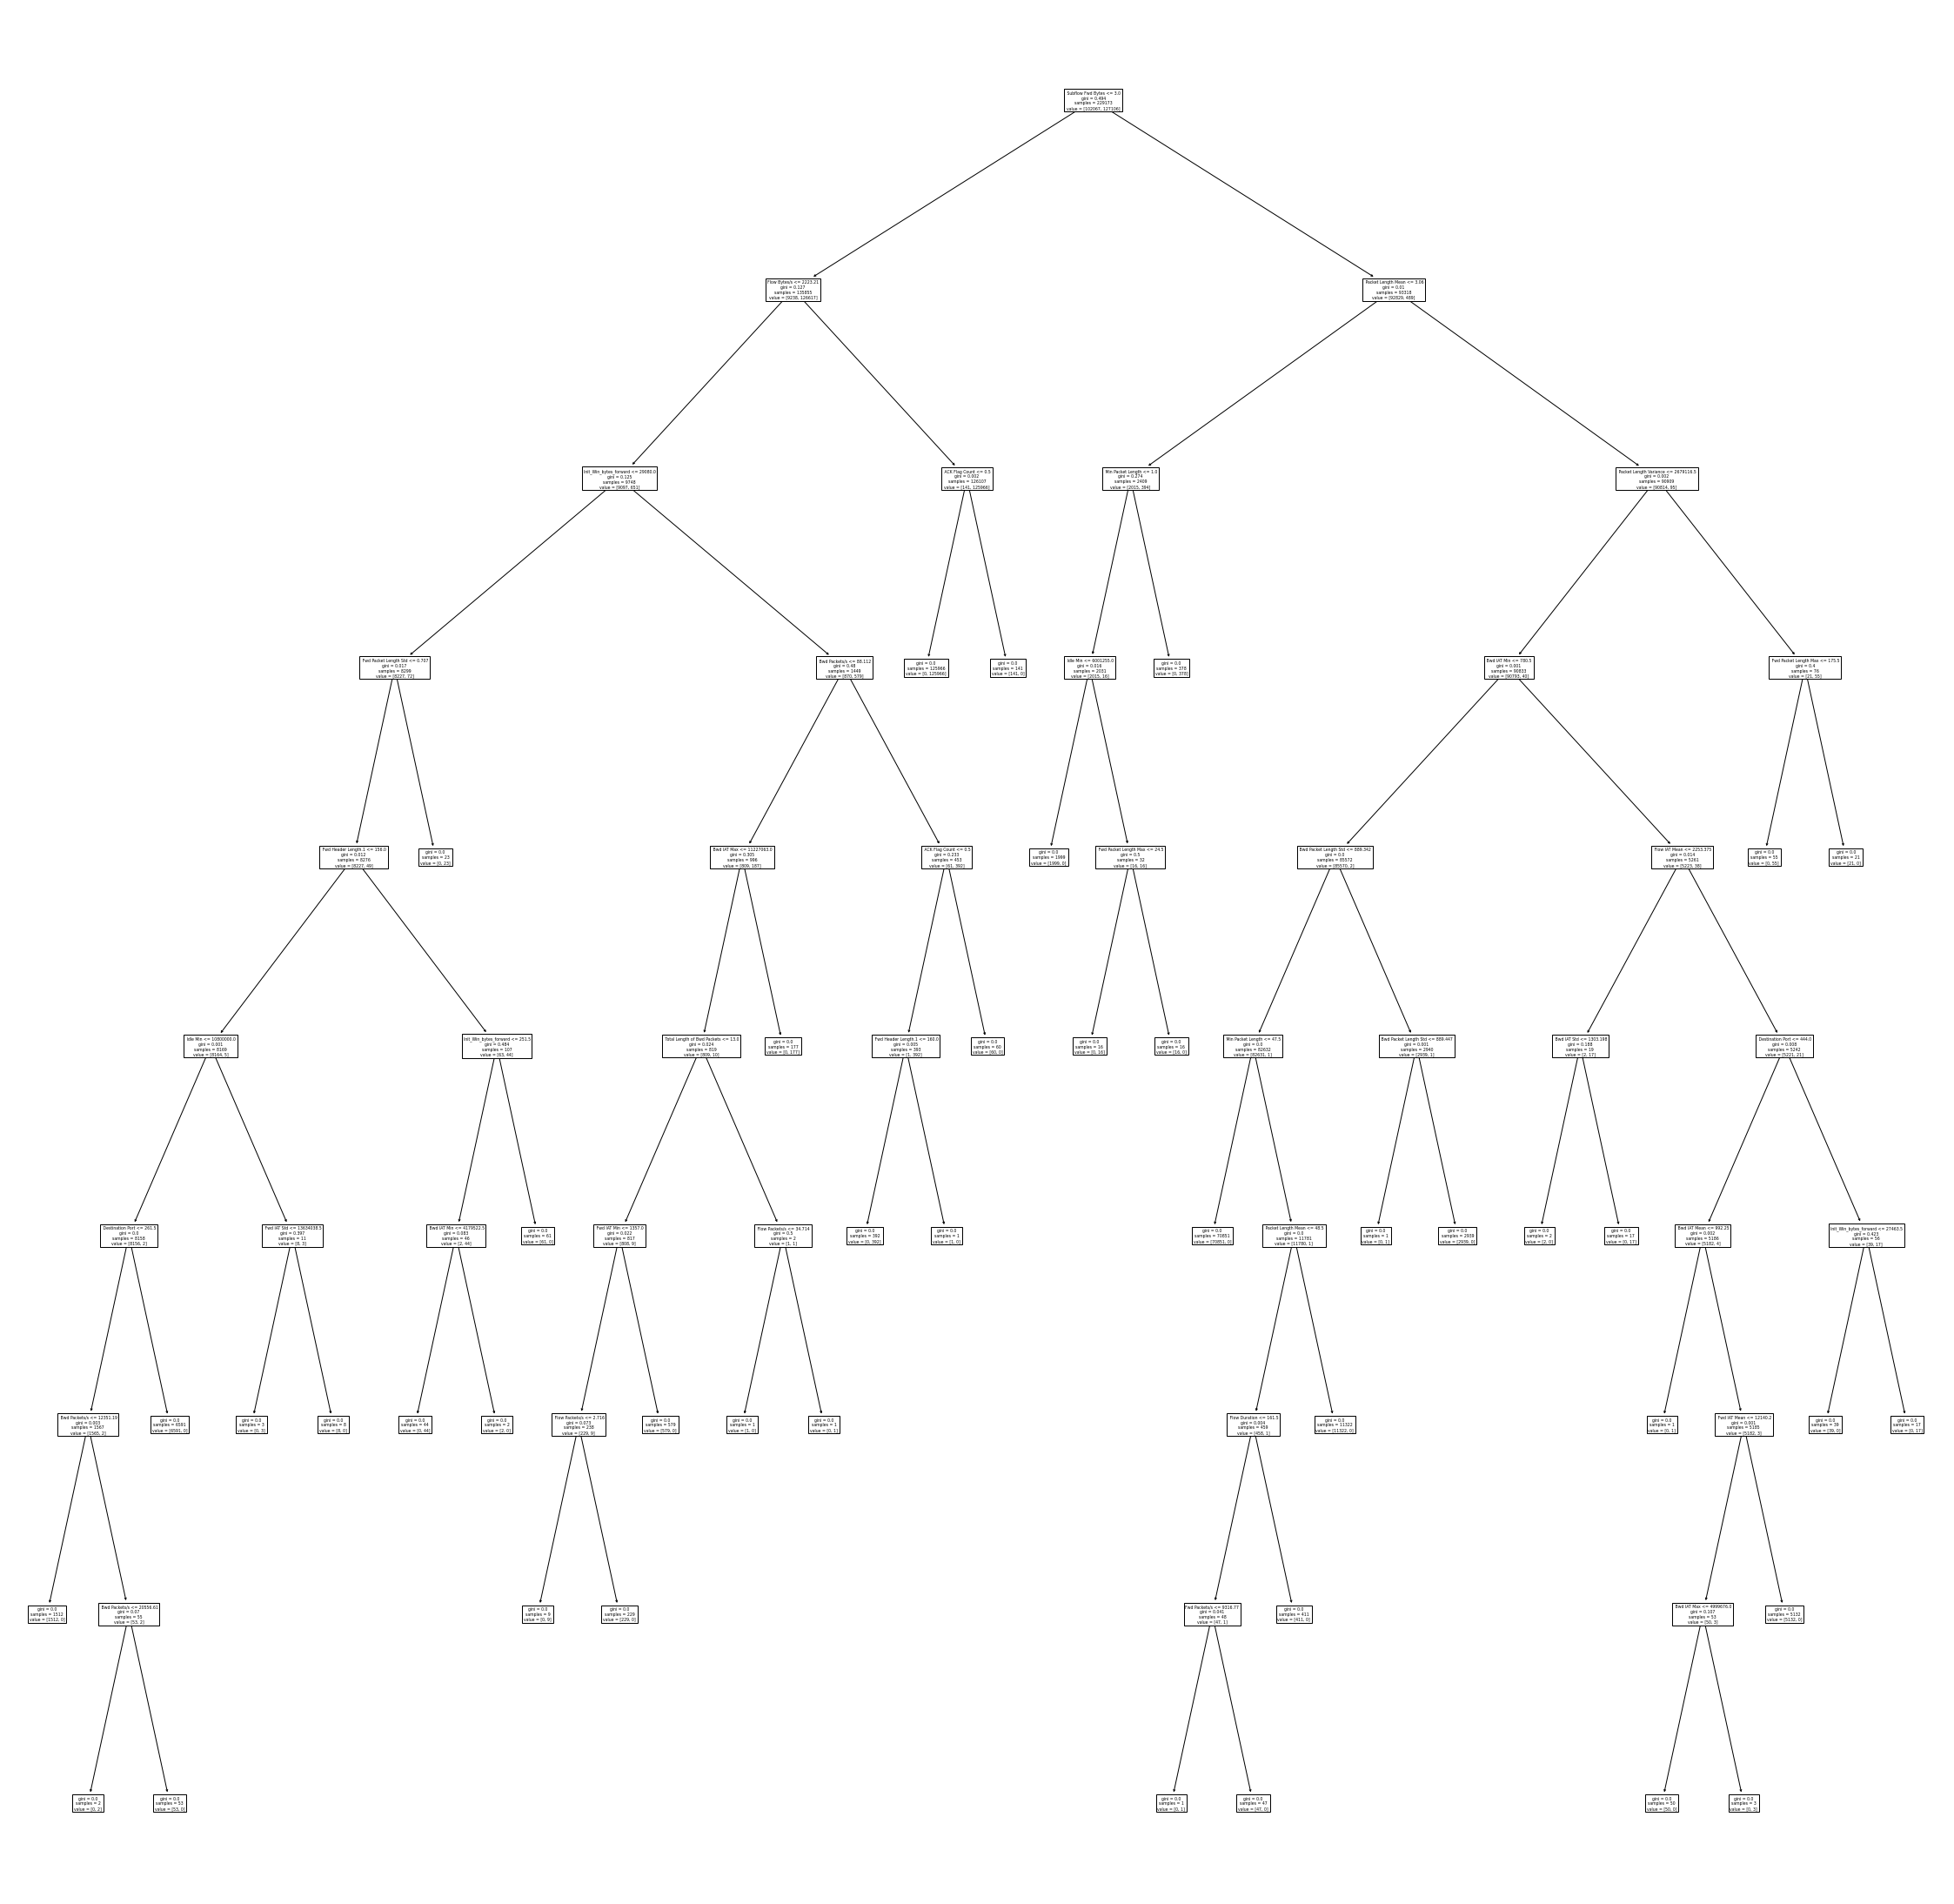

In [84]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))
tree.plot_tree(tree_classifier_portscan,feature_names=portscan.columns[:-1],)
plt.savefig('portscan_tree.png')